### Example 2.6 from Ernie Chan's *Algorithmic Trading*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [37]:
start_dt = datetime.datetime(2006, 4, 26)
end_dt = datetime.datetime(2012, 4, 9)

In [38]:
import pandas.io.data as web
EWA = web.DataReader("EWA", 'yahoo', start_dt, end_dt)
EWC = web.DataReader("EWC", 'yahoo', start_dt, end_dt)

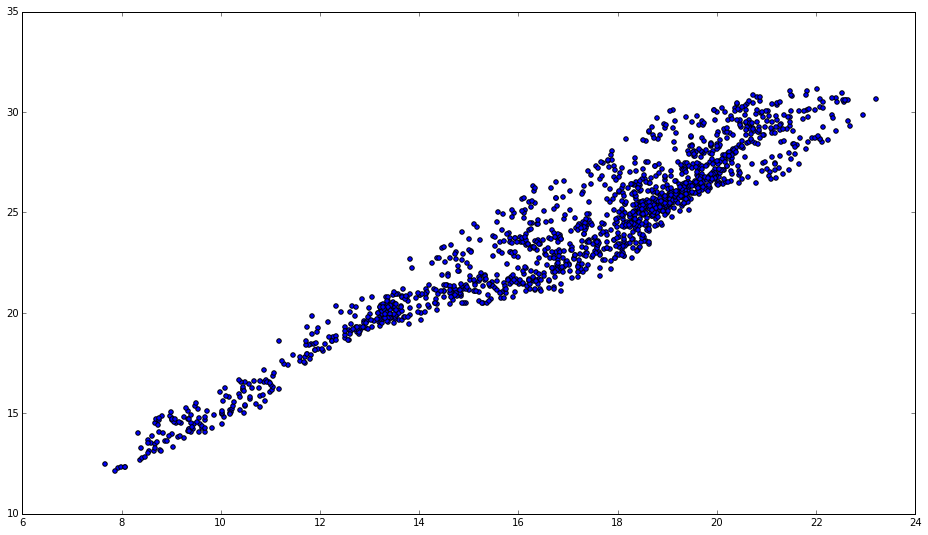

In [39]:
fig = plt.figure(figsize=(16,9))
plt.scatter(EWA['Adj Close'], EWC['Adj Close'])

In [6]:
import sklearn as skl
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression().fit(
    EWA['Adj Close'][:,None], 
    EWC['Adj Close'])

model.coef_

array([ 1.18686828])

In [42]:
sprd = EWC['Adj Close'] - model.coef_ * EWA['Adj Close']

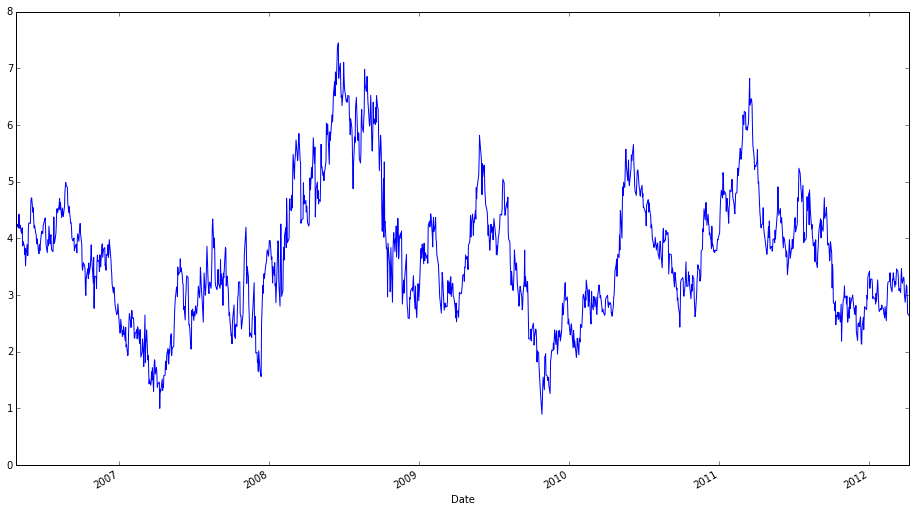

In [43]:
sprd.plot(figsize=(16,9))

In [44]:
import mean_reversion as mr
mr.halflife(sprd)

array([ 27.8428908])

In [45]:
import statsmodels.tsa.stattools as sms
adf = sms.adfuller(sprd, maxlag=1, regression="c")
print "EWA vs EWC"
print "Test statistic: %f, pValue: %f" % adf[0:2]

EWA vs EWC
Test statistic: -3.647669, pValue: 0.004912
